In [1]:
import os, gzip
import yaml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_config(path):
    return yaml.load(open('config.yaml', 'r'), Loader=yaml.SafeLoader)


def normalize_data(inp):
    inp = inp - np.mean(inp,axis=0)
    inp = inp/np.std(inp, axis=0)
    return inp


def one_hot_encoding(labels, num_classes=10):
    output = np.zeros((len(labels), num_classes))
    for i in range(len(labels)):
        output[i][labels[i]] = 1
    return output


def load_data(path, mode='train'):
    """
    Load Fashion MNIST data.
    Use mode='train' for train and mode='t10k' for test.
    """

    labels_path = os.path.join(path, f'{mode}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{mode}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    normalized_images = normalize_data(images)
    one_hot_labels    = one_hot_encoding(labels, num_classes=10)

    return normalized_images, one_hot_labels


def softmax(x):
    x = x - np.max(x, axis=1).reshape(-1, 1)
    x = np.exp(x)
    x = x / np.sum(x, axis=1).reshape(-1, 1)
    #print(x)
    return x + 1e-9


In [3]:
class Activation():
    """
    The class implements different types of activation functions for
    your neural network layers.

    Example (for sigmoid):
        >>> sigmoid_layer = Activation("sigmoid")
        >>> z = sigmoid_layer(a)
        >>> gradient = sigmoid_layer.backward(delta=1.0)
    """

    def __init__(self, activation_type = "sigmoid"):
        """
        TODO: Initialize activation type and placeholders here.
        """
        if activation_type not in ["sigmoid", "tanh", "ReLU", "leakyReLU"]:
            raise NotImplementedError(f"{activation_type} is not implemented.")

        # Type of non-linear activation.
        self.activation_type = activation_type

        # Placeholder for input. This will be used for computing gradients.
        self.x = None

    def __call__(self, a):
        """
        This method allows your instances to be callable.
        """
        return self.forward(a)

    def forward(self, a):
        """
        Compute the forward pass.
        """
        if self.activation_type == "sigmoid":
            return self.sigmoid(a)

        elif self.activation_type == "tanh":
            return self.tanh(a)

        elif self.activation_type == "ReLU":
            return self.ReLU(a)

        elif self.activation_type == "leakyReLU":
            return self.leakyReLU(a)

    def backward(self, delta):
        """
        Compute the backward pass.
        """
        if self.activation_type == "sigmoid":
            grad = self.grad_sigmoid()

        elif self.activation_type == "tanh":
            grad = self.grad_tanh()

        elif self.activation_type == "ReLU":
            grad = self.grad_ReLU()
            
        elif self.activation_type == "leakyReLU":
            grad = self.grad_leakyReLU()

        return grad * delta

    def sigmoid(self, x):
        self.x = x
        return 1/(1+np.exp(-x))
        raise NotImplementedError("Sigmoid not implemented")

    def tanh(self, x):
        self.x = x
        return 2 / (1 + np.exp(-2*x)) - 1
        raise NotImplementedError("Tanh not implemented")

    def ReLU(self, x):
        self.x = x
        return np.maximum(1e-20, x)
    
        raise NotImplementedError("ReLu not implemented")

    def leakyReLU(self, x):
        self.x = x
        y1 = np.maximum(0, x)
        y2 = ((x <= 0) * x * 0.1) 
        return y1+y2
        raise NotImplementedError("leakyReLu not implemented")

    def grad_sigmoid(self):
        """
        TODO: Compute the gradient for sigmoid here.
        """
        return self.sigmoid(self.x) * (1 - self.sigmoid(self.x))
        raise NotImplementedError("Sigmoid gradient not implemented")

    def grad_tanh(self):
        """
        TODO: Compute the gradient for tanh here.
        """
        return 1 - self.tanh(self.x) ** 2
        raise NotImplementedError("tanh gradient not implemented")

    def grad_ReLU(self):
        """
        TODO: Compute the gradient for ReLU here.
        """
        return (self.x > 0) * np.ones_like(self.x) + np.ones_like(self.x) * 1e-10
        raise NotImplementedError("ReLU gradient not implemented")

    def grad_leakyReLU(self):
        """
        TODO: Compute the gradient for leaky ReLU here.
        """
        y1 = (self.x > 0) * np.ones_like(self.x)
        y2 = ((self.x <= 0) * np.ones_like(self.x) * 0.1) 
        return y1 + y2
        raise NotImplementedError("leakyReLU gradient not implemented")
    def saveWeight(self):
        return
    def reloadWeight(self):
        return


In [4]:
class Layer():
    """
    This class implements Fully Connected layers for your neural network.

    Example:
        >>> fully_connected_layer = Layer(784, 100)
        >>> output = fully_connected_layer(input)
        >>> gradient = fully_connected_layer.backward(delta=1.0)
    """

    def __init__(self, in_units, out_units):
        """
        Define the architecture and create placeholder.
        """
        
        self.w = np.random.rand(in_units, out_units) * 1e-10   # Declare the Weight matrix
        self.b = np.random.rand(out_units)    # Create a placeholder for Bias
        self.x = None    # Save the input to forward in this
        self.a = None    # Save the output of forward pass in this (without activation
        self.d_x = None  # Save the gradient w.r.t x in this
        self.d_w = None  # Save the gradient w.r.t w in this
        self.d_b = None  # Save the gradient w.r.t b in this
        
        self.saved_weight = None
        self.saved_bias = None

    def __call__(self, x):
        """
        Make layer callable.
        """
        return self.forward(x)

    def forward(self, x):
        """
        TODO: Compute the forward pass through the layer here.
        DO NOT apply activation here.
        Return self.a
        """
        self.x = x
        self.a = x@self.w + self.b
        return self.a
        raise NotImplementedError("Layer forward pass not implemented.")

    def backward(self, delta):
        """
        TODO: Write the code for backward pass. This takes in gradient from its next layer as input,
        computes gradient for its weights and the delta to pass to its previous layers.
        Return self.dx
        """
        self.d_w = np.dot(self.x.T, delta)
        self.d_b = np.sum(delta, axis=0)
        self.d_x = np.dot(delta, self.w.T)
        return self.d_x
        #raise NotImplementedError("Backprop for Layer not implemented.")
    def saveWeight(self):
        self.saved_weight = self.w
        self.saved_bias = self.b
        
    def reloadWeight(self):
        self.w = self.saved_weight
        self.b = self.saved_bias


In [5]:
class Neuralnetwork():
    """
    Create a Neural Network specified by the input configuration.

    Example:
        >>> net = NeuralNetwork(config)
        >>> output = net(input)
        >>> net.backward()
    """

    def __init__(self, config):
        """
        Create the Neural Network using config.
        """
        self.config = config
        self.layers = []     # Store all layers in this list.
        self.x = None        # Save the input to forward in this
        self.y = None        # Save the output vector of model in this
        self.targets = None  # Save the targets in forward in this variable
        self.Lambda = config['L2_penalty']
        self.momentum = config['momentum']
        self.lr = self.config['learning_rate']
        if self.momentum:
            self.gamma = self.config['momentum_gamma']
            self.m_w = [0] * (len(config['layer_specs']) - 1) * 2
            self.m_b = [0] * (len(config['layer_specs']) - 1) * 2
            
        # Add layers specified by layer_specs.
        for i in range(len(config['layer_specs']) - 1):
            self.layers.append(Layer(config['layer_specs'][i], config['layer_specs'][i+1]))
            if i < len(config['layer_specs']) - 2:
                self.layers.append(Activation(config['activation']))

    def __call__(self, x, targets=None):
        """
        Make NeuralNetwork callable.
        """
        return self.forward(x, targets)

    def forward(self, x, targets=None):
        """
        TODO: Compute forward pass through all the layers in the network and return it.
        If targets are provided, return loss as well.
        """
        for i in range(len(self.layers)):
            if i % 2:
                x = self.layers[i](x)
            else:
                self.layers[i](x)
                x = self.layers[i].a
        if targets is not None:
            return x, self.loss(x, targets)
        return x, None
        raise NotImplementedError("Forward not implemented for NeuralNetwork")

    def loss(self, logits, targets):
        '''
        TODO: compute the categorical cross-entropy loss and return it.
        '''
        self.targets = targets
        self.logits = logits
        #print(self.logits)
        res = np.sum(- targets * np.log(softmax(logits)))
        for i in range(len(self.layers)):
            if i % 2 == 0:
                res += self.Lambda * np.linalg.norm(self.layers[i].w)
        return res
        raise NotImplementedError("Loss not implemented for NeuralNetwork")

    def backward(self):
        '''
        TODO: Implement backpropagation here.
        Call backward methods of individual layers.
        '''
        delta = softmax(self.logits) - self.targets
        for i in range(len(self.layers)-1, -1, -1):
            delta = self.layers[i].backward(delta)
        #for i in range(len(self.layers)-1, -1, -1):
            if i % 2 == 0:
                self.m_w[i] = self.gamma * self.m_w[i] + (1-self.gamma) * (self.layers[i].d_w + 2 * self.Lambda * self.layers[i].w)
                self.layers[i].w -= self.lr * self.m_w[i]
                self.m_b[i] = self.gamma * self.m_b[i] + (1-self.gamma) * (self.layers[i].d_b)
                self.layers[i].b -= self.lr * self.m_b[i]
        return
    
    def saveWeight(self):
        for i in range(len(self.layers)-1, -1, -1):
            self.layers[i].saveWeight()
    
    def reloadWeight(self):
        for i in range(len(self.layers)-1, -1, -1):
            self.layers[i].reloadWeight()

In [6]:
def train(model, x_train, y_train, x_valid, y_valid, config):
    """
    TODO: Train your model here.
    Implement batch SGD to train the model.
    Implement Early Stopping.
    Use config to set parameters for training like learning rate, momentum, etc.
    """
    early_stop = config['early_stop']
    early_stop_epoch = config['early_stop_epoch']
    epochAmount = config['epochs']
    batchSize = config['batch_size']
    batch = int(x_train.shape[0] / batchSize)
    #print(batch, x_train.shape[0])
    
    #print(x_train)
    bestAcc = 0
    earlyStopCounter = 0
    trainLossEpoch = []
    trainAccEpoch = []
    validatonLossEpoch = []
    validationAccEpoch = []
    for epoch in range(epochAmount):
        trainLoss = []
        trainAcc = []
        validationLoss = []
        validationAcc = []
        accessSequence = list(range(batch))
        np.random.shuffle(accessSequence)
        for iteration in accessSequence:
            inputs = x_train[iteration*batchSize:(iteration+1)*batchSize]
            targets = y_train[iteration*batchSize:(iteration+1)*batchSize]
            outputs, _ = model(inputs)
            loss = model.loss(outputs, targets)
            model.backward()
            prob = softmax(outputs)
            prediction = np.argmax(prob, axis=1)
            targets = np.argmax(targets, axis=1)
            #print(prediction, targets)
            acc = np.mean((prediction == targets))
            trainLoss.append(loss/batchSize)
            trainAcc.append(acc)
        trainLossEpoch.append(np.mean(trainLoss))
        trainAccEpoch.append(np.mean(trainAcc))
        validationAcc
        validateOut, _ = model(x_valid)
        ValidProb = softmax(validateOut)
        ValidPred = np.argmax(ValidProb, axis=1)
        ValidTarget = np.argmax(y_valid, axis=1)
        ValidAcc = np.mean((ValidPred == ValidTarget))
        validationAccEpoch.append(ValidAcc)
        validatonLossEpoch.append(model.loss(validateOut, y_valid)/len(ValidPred))
        #print("Validation : ", ValidAcc)
        
        if early_stop:
            if ValidAcc >= bestAcc:
                model.saveWeight()
                bestAcc = ValidAcc
                earlyStopCounter = 0
            else:
                earlyStopCounter += 1
                if earlyStopCounter == early_stop_epoch:
                    model.reloadWeight()
                    print("early stopped")
                    break
        else:
            continue
            #
    return trainLossEpoch, trainAccEpoch, validatonLossEpoch, validationAccEpoch
    #raise NotImplementedError("Train method not implemented")


In [7]:
def checker_grad_bias(referenceModel, experienmentModel, x_train, y_train, layerIndex):
    output, _= referenceModel(x_train)
    #print(output, y_train)
    loss = referenceModel.loss(output, y_train)
    referenceModel.backward()
    experienmentModel.layers[layerIndex].b[0] += 1e-2
    outputUpper, _ = experienmentModel(x_train)
    upper = experienmentModel.loss(outputUpper, y_train)
    experienmentModel.layers[layerIndex].b[0] -= 1e-2 * 2
    outputLower, _ = experienmentModel(x_train)
    lower = experienmentModel.loss(outputLower, y_train)
    experienmentModel.layers[layerIndex].b[0] += 1e-2
    delta = (upper - lower) / (2 * 1e-2)
    print("grad diff at layer ", layerIndex, " is ", delta - referenceModel.layers[layerIndex].d_b[0])
    #return delta, model.layers[-2].d_b

In [8]:
def checker_grad_weight(referenceModel, experienmentModel, x_train, y_train, layerIndex, weightIndex):
    output, _= referenceModel(x_train)
    #print(output, y_train)
    loss = referenceModel.loss(output, y_train)
    referenceModel.backward()
    experienmentModel.layers[layerIndex].w[weightIndex][weightIndex] += 1e-2
    outputUpper, _ = experienmentModel(x_train)
    upper = experienmentModel.loss(outputUpper, y_train)
    experienmentModel.layers[layerIndex].w[weightIndex][weightIndex] -= 1e-2 * 2
    outputLower, _ = experienmentModel(x_train)
    lower = experienmentModel.loss(outputLower, y_train)
    experienmentModel.layers[layerIndex].w[weightIndex][weightIndex] += 1e-2
    delta = (upper - lower) / (2 * 1e-2)
    print("grad diff at layer ", layerIndex, "location: ", weightIndex, " is ", delta - referenceModel.layers[layerIndex].d_w[weightIndex][weightIndex])
    #return delta, model.layers[-2].d_b

In [9]:
def Q3_C(x_train, y_train, config):
    visited = set()
    X = []
    y = []
    for i in range(len(y_train)):
        if np.argmax(y_train[i]) in visited:
            continue
        else:
            visited.add(np.argmax(y_train[i]))
            X.append(x_train[i])
            y.append(y_train[i])
    X = np.array(X)
    y = np.array(y)
    #print(X, y)
    referenceModel  = Neuralnetwork(config)
    experienmentModel  = Neuralnetwork(config)
    for i in range(len(referenceModel.layers)):
        if i % 2 == 0:
            experienmentModel.layers[i].w = referenceModel.layers[i].w
            experienmentModel.layers[i].b = referenceModel.layers[i].b
    checker_grad_bias(referenceModel, experienmentModel, X, y, 4)
    checker_grad_bias(referenceModel, experienmentModel, X, y, 2)
    checker_grad_bias(referenceModel, experienmentModel, X, y, 0)
    
    
    checker_grad_weight(referenceModel, experienmentModel, X, y, 4, 0)
    checker_grad_weight(referenceModel, experienmentModel, X, y, 2, 0)
    checker_grad_weight(referenceModel, experienmentModel, X, y, 0, 0)
    
    checker_grad_weight(referenceModel, experienmentModel, X, y, 4, 1)
    checker_grad_weight(referenceModel, experienmentModel, X, y, 2, 1)
    checker_grad_weight(referenceModel, experienmentModel, X, y, 0, 1)

grad diff at layer  4  is  0.001516688154367285
grad diff at layer  2  is  -6.085119314997358e-05
grad diff at layer  0  is  -8.587321485716383e-11
grad diff at layer  4 location:  0  is  0.002884828728126107
grad diff at layer  2 location:  0  is  -5.7353129121505945e-05
grad diff at layer  0 location:  0  is  2.078330276407754e-11
grad diff at layer  4 location:  1  is  -0.0009104237980919055
grad diff at layer  2 location:  1  is  -6.388895582735743e-05
grad diff at layer  0 location:  1  is  1.8903933389183005e-10
early stopped
Test :  0.8643


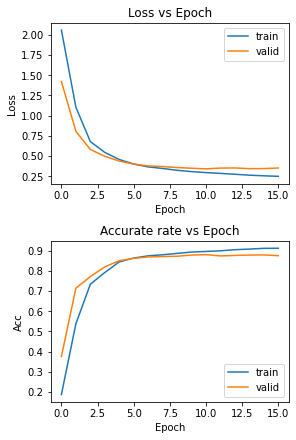

In [10]:
################################################################################
# CSE 251B: Programming Assignment 2
# Winter 2021
################################################################################
# To install PyYaml, refer to the instructions for your system:
# https://pyyaml.org/wiki/PyYAMLDocumentation
################################################################################
# If you don't have NumPy installed, please use the instructions here:
# https://scipy.org/install.html
################################################################################

def test(model, X_test, y_test):
    """
    TODO: Calculate and return the accuracy on the test set.
    """
    out, _ = model(X_test)
    prob = softmax(out)
    pred = np.argmax(prob, axis=1)
    y_test = np.argmax(y_test, axis=1)
    acc = np.mean((y_test == pred))
    print("Test : ", acc)
    return


if __name__ == "__main__":
    np.random.seed(42)
    # Load the configuration.
    config = load_config("./")

    # Create the model
    model  = Neuralnetwork(config)

    # Load the data
    x_train, y_train = load_data(path="./", mode="train")
    x_test,  y_test  = load_data(path="./", mode="t10k")
    Q3_C(x_train, y_train, config)
    
    shuffler = np.random.permutation(len(x_train))
    x_train = x_train[shuffler]
    y_train = y_train[shuffler]
    splitPoint = len(x_train)//5
    x_valid, y_valid = x_train[:splitPoint], y_train[:splitPoint]
    x_train, y_train = x_train[splitPoint:], y_train[splitPoint:]

    # TODO: train the model
    trainLossEpoch, trainAccEpoch, validatonLossEpoch, validationAccEpoch = train(model, x_train, y_train, x_valid, y_valid, config)
    test_acc = test(model, x_test, y_test)

    # TODO: Plots
    #print(trainLossEpoch, trainAccEpoch, validatonLossEpoch, validationAccEpoch)
    
    fig, axs = plt.subplots(2, 1, figsize=(4, 6), constrained_layout=True)
    axs[0].plot(list(range(len(trainLossEpoch))), trainLossEpoch, label="train")
    axs[0].plot(list(range(len(validatonLossEpoch))), validatonLossEpoch, label="valid")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[0].set_title("Loss vs Epoch")
    axs[0].legend(loc='best')
    
    
    axs[1].plot(list(range(len(trainAccEpoch))), trainAccEpoch, label="train")
    axs[1].plot(list(range(len(validationAccEpoch))), validationAccEpoch, label="valid")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Acc")
    axs[1].set_title("Accurate rate vs Epoch")
    axs[1].legend(loc='best')